### Principal Component Analysis
- Helps reduce image size to the point where the information gained from the image is not lost.
- It also improved model training time and other processing.

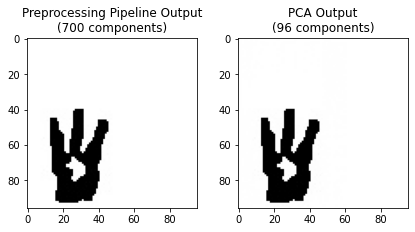

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

img = cv2.imread('output_more_right_global.jpg')
# cvprint(img.shape)
blue, green, red = cv2.split(img)

# img.shape

# #initialize PCA with first 60 principal components
pca = PCA(60)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

f, axarr = plt.subplots(1, 2)
f.tight_layout(pad=1)
axarr[0].title.set_text('Preprocessing Pipeline Output\n(700 components)')
# axarr[0].axis('off')
axarr[0].imshow(img)
axarr[1].title.set_text('PCA Output\n(96 components)')
# axarr[1].axis('off')
axarr[1].imshow(img_compressed)
